In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
    


# read
fruits = pd.read_table('fruit_data_my.txt')
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique())) #{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# split
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)              # default is 75% / 25% train-test split


In [5]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score

# recall = percent of judged criminals from all criminals
# precision = percent of criminals from all judged
def print_scores(y_test_my, y_pred_my):
    print('recall: {:.2f}'.format(recall_score(y_test_my, y_pred_my)), 'precision: {:.2f}'.format(precision_score(y_test_my, y_pred_my)), 'accuracy: {:.2f}'.format(accuracy_score(y_test_my, y_pred_my))  )
    print('roc_auc: {:.2f}'.format(roc_auc_score(y_test_my, y_pred_my)))

y_test_my = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # 3 criminals / 7 good
y_pred_my = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # perfect! r=1, p=1, a=1
print_scores(y_test_my, y_pred_my)
y_test_my = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # 3 criminals / 7 good
y_pred_my = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # tyranny: r=1, p=0.7, a=0.7 (all criminals judged, but good men too)
print_scores(y_test_my, y_pred_my)
y_test_my = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # 3 criminals / 7 good
y_pred_my = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1] # democracy: r=0.57, p=1, a=0.7 (no one good man is judged)
print_scores(y_test_my, y_pred_my)






recall: 1.00 precision: 1.00 accuracy: 1.00
roc_auc: 1.00
recall: 1.00 precision: 0.70 accuracy: 0.70
roc_auc: 0.50
recall: 0.57 precision: 1.00 accuracy: 0.70
roc_auc: 0.79


In [55]:
def print_scores(y_test_my, y_pred_my):
    print('recall: {:.2f}'.format(recall_score(y_test_my, y_pred_my)), 'precision: {:.2f}'.format(precision_score(y_test_my, y_pred_my)), 'accuracy: {:.2f}'.format(accuracy_score(y_test_my, y_pred_my))  )
# print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) #recall: 0.57 precision: 1.00 accuracy: 0.70
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) #
print('back way')
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]) #
print_scores([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) #



recall: 0.00 precision: 0.00 accuracy: 0.20
recall: 0.00 precision: 0.00 accuracy: 0.10
recall: 0.00 precision: 0.00 accuracy: 0.00
recall: 0.14 precision: 0.25 accuracy: 0.10
recall: 0.29 precision: 0.40 accuracy: 0.20
recall: 0.43 precision: 0.50 accuracy: 0.30
recall: 0.57 precision: 0.57 accuracy: 0.40
recall: 0.71 precision: 0.62 accuracy: 0.50
recall: 0.86 precision: 0.67 accuracy: 0.60
recall: 1.00 precision: 0.70 accuracy: 0.70
back way
recall: 0.14 precision: 1.00 accuracy: 0.40
recall: 0.29 precision: 1.00 accuracy: 0.50
recall: 0.43 precision: 1.00 accuracy: 0.60
recall: 0.57 precision: 1.00 accuracy: 0.70
recall: 0.71 precision: 1.00 accuracy: 0.80
recall: 0.86 precision: 1.00 accuracy: 0.90
recall: 1.00 precision: 1.00 accuracy: 1.00
recall: 1.00 precision: 0.88 accuracy: 0.90
recall: 1.00 precision: 0.78 accuracy: 0.80
recall: 1.00 precision: 0.70 accuracy: 0.70


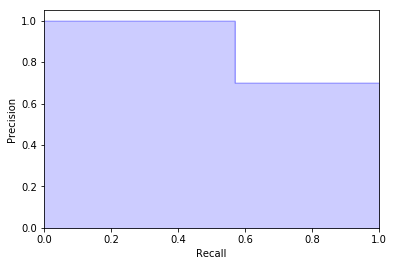

In [1]:
# iterate throug all possible predictions, that give accuracy = 0.7 (0.7, cause in our y_score a=0.7)
# draws for each those y_prediction - prec and recall
# accuracy - is default (one of many possible) thresholds


def draw_precision_recall(y_test, y_score):
    from sklearn.metrics import average_precision_score
#     average_precision = average_precision_score(y_test, y_score)
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
    
y_test = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # 3 criminals / 7 good
y_score =[0, 0, 0, 0, 0, 0, 1, 1, 1, 1] # democracy: r=0.57, p=1, a=0.7 (no one good man is judged)
draw_precision_recall(y_test, y_score)


In [28]:
from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    def plot_precision_recall():
        precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
        closest_zero = np.argmin(np.abs(thresholds))
        closest_zero_p = precision[closest_zero]
        closest_zero_r = recall[closest_zero]

        plt.figure()
        plt.xlim([0.0, 1.01])
        plt.ylim([0.0, 1.01])
        plt.plot(precision, recall, label='Precision-Recall Curve')
        plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
        plt.xlabel('Precision', fontsize=16)
        plt.ylabel('Recall', fontsize=16)
        plt.axes().set_aspect('equal')
        plt.show()
        return 0

IndentationError: unexpected indent (<ipython-input-28-8a5d5e8e32e2>, line 2)

In [8]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

y_test_predicted = knn.predict(X_test)
y_test_predicted

# print('knn test score: {:.3f}'.format(knn.score(X_test, y_test)))
# print('knn predicts lemon as: {:}'.format(lookup_fruit_name[np.round(knn.predict([[208, 6.7, 11.2, 48]]),0)[0]] ))
# recall = recall_score(y_test, y_train)
# precision = precision_score(y_test, svm_predicted)

array([3, 2, 1, 3, 4, 4, 2, 1, 2, 3, 4, 2, 2, 2, 2], dtype=int64)

In [5]:
def scale_0_4(value):
    value = 4. if value > 4 else value
    value = 1. if value < 1 else value
    return value

# scale
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# plot
# from library import adspy_shared_utilities as asu
# asu.plot_fruit_knn(X_train, y_train, 5, 'uniform')   

# KNN
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
print('knn test score: {:.3f}'.format(knn.score(X_test, y_test)))
print('knn predicts lemon as: {:}'.format(lookup_fruit_name[np.round(knn.predict([[208, 6.7, 11.2, 48]]),0)[0]] ))

# KNN regression
knnreg = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train)
print('knnreg test score: {:.3f}'.format(knnreg.score(X_test, y_test)))
print('knnreg predicts lemon as: {:}'.format(lookup_fruit_name[np.round(knnreg.predict([[208, 6.7, 11.2, 48]]),0)[0]] ))

# Linear regression
linreg = LinearRegression().fit(X_train, y_train)
print('linreg test score: {:.3f}'.format(linreg.score(X_test, y_test)))
print('linreg predicts lemon as: {:}'.format(lookup_fruit_name[np.round(scale_0_4(linreg.predict([[208, 6.7, 11.2, 48]])),0)] ))

# Ridge regression
linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print('linridge score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('linridge predicts lemon as: {:}'.format(lookup_fruit_name[np.round(scale_0_4(linridge.predict([[208, 6.7, 11.2, 48]])),0)] ))
# Ridge regression with regularization parameter: alpha
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    print('linridge alpha=',this_alpha,'score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
    
# Lasso regression
linlasso = Lasso(alpha=0.5, max_iter = 10000).fit(X_train, y_train)
print('linlasso score (test): {:.3f}'.format(linlasso.score(X_test, y_test)))
print('linlasso predicts lemon as: {:}'.format(lookup_fruit_name[np.round(scale_0_4(linlasso.predict([[208, 6.7, 11.2, 48]])),0)[0]] ))
# Lasso regression with regularization parameter: alpha        
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    print('linlasso alpha=',alpha,'score (test): {:.3f}'.format(linlasso.score(X_test, y_test)))

    
    
# Polynomial regression
# X_poly = PolynomialFeatures(degree=2).fit_transform(X)
# X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, random_state=0)
# linreg = LinearRegression().fit(X_train_p, y_train_p)
# print('poly + linreg test score: {:.3f}'.format(linreg.score(X_test_p, y_test_p)))
# linreg.predict([[208, 6.7, 11.2, 48]])
# print('poly + linreg predicts lemon as: {:}'.format(lookup_fruit_name[np.round(scale_0_4(linreg.predict([[208, 6.7, 11.2, 48]])),0)] ))


def add_features(line, deg): # for prediction we should convert test values too
#     col = line.reshape(len(line),1) # transposes, line of 11 -> to column of 11
    col = line
    poly = PolynomialFeatures(degree=deg)
    value = poly.fit_transform(col)
    return value
for i, value in enumerate([1,3,6,9]):
    # prepare data
    X_train_poly = add_features(X_train, value)              # 1row x 11cols  ->  11rows x 7cols (11,7)
#     X_axis_poly = add_features(np.linspace(0,10,100), value) # 1row x 100cols -> 100rows x 7cols (100,7)
    X_test_poly = add_features(X_test, value)                # 1row x  4cols  ->   4rows x 7cols (4,7)

    # learn
    linreg = LinearRegression().fit(X_train_poly, y_train)

    # score
    print('poly degree ', value, 'score (test): {:.3f}'.format(linreg.score(X_test_poly, y_test)))

    # use
    #y_train_predict_one = linreg.predict([list(X_train_poly[0,:])]) #input=> 1rows x 7cols, output=> 1.22595734, but y_train[0] = 1.21213026
    #y_test_predict_one = linreg.predict([list(X_test_poly[0,:])])   #input=> 1rows x 7cols, output=> 0.98597635, but y_test[0] = 0.99517935
    y_test_predict = linreg.predict(X_test_poly)   #input=> 4rows x 7cols, output=> 1row x 4cols: array([ 0.98597635, -0.18539455,  0.37296501,  1.18016858]), but y_test = [ 0.99517935, -0.16081   ,  0.3187423 ,  1.53763897]
    #y_axis_predict = linreg.predict(X_axis_poly)   #input=> 100rows x 7cols, output=> 1row x 100cols
    print('poly degree ', value, 'predicts: ',y_test_predict)




knn test score: 0.933
knn predicts lemon as: lemon
knnreg test score: 0.513
knnreg predicts lemon as: lemon
linreg test score: 0.541
linreg predicts lemon as: lemon
linridge score (test): 0.445
linridge predicts lemon as: lemon
linridge alpha= 0 score (test): 0.541
linridge alpha= 1 score (test): 0.536
linridge alpha= 10 score (test): 0.488
linridge alpha= 20 score (test): 0.445
linridge alpha= 50 score (test): 0.362
linridge alpha= 100 score (test): 0.292
linridge alpha= 1000 score (test): 0.160
linlasso score (test): 0.230
linlasso predicts lemon as: orange
linlasso alpha= 0.5 score (test): 0.230
linlasso alpha= 1 score (test): 0.126
linlasso alpha= 2 score (test): 0.119
linlasso alpha= 3 score (test): 0.113
linlasso alpha= 5 score (test): 0.099
linlasso alpha= 10 score (test): 0.050
linlasso alpha= 20 score (test): -0.017
linlasso alpha= 50 score (test): -0.017
poly degree  1 score (test): 0.541
poly degree  1 predicts:  [ 2.07003408  2.03690971  1.69079894  2.15418561  3.21021501  

In [ ]:
# next in Module 2:

# Linear models for classification
#     Logistic regression
#     Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)
#     Logistic regression on simple synthetic dataset
#     Logistic regression regularization: C parameter
#     Application to real dataset

# Support Vector Machines
#     Linear Support Vector Machine
#     Linear Support Vector Machine: C parameter
#     Application to real dataset
    
# Multi-class classification with linear models
#     LinearSVC with M classes generates M one vs rest classifiers.
#     Multi-class results on the fruit dataset
    
# Kernelized Support Vector Machines
#     Classification
#     Support Vector Machine with RBF kernel: gamma parameter
#     Support Vector Machine with RBF kernel: using both C and gamma parameter
#     Application of SVMs to a real dataset: unnormalized data
#     Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling
        
# Cross-validation
#     Example based on k-NN classifier with fruit dataset (2 features)
#     A note on performing cross-validation for more advanced scenarios.
#     Validation curve example

# Decision Trees
#     Setting max decision tree depth to help avoid overfitting
#     Visualizing decision trees
#     Pre-pruned version (max_depth = 3)
#     Feature importance
#     Decision Trees on a real-world dataset

In [2]:
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
fruits = pd.read_table('fruit_data_my.txt')
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)              # default is 75% / 25% train-test split
knn = KNeighborsClassifier(n_neighbors = 6)                                            # Create classifier object
knn.fit(X_train, y_train)                                                              # Train the classifier
print(knn.score(X_test, y_test))
print(log_loss(y_test, knn.predict_proba(X_test)))

0.933333333333
2.45419746756
